<a href="https://colab.research.google.com/github/PrachiJadhav12/Credit_Card_default_Prediction/blob/main/Final_Credit_Default_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
**Name:** Prachi Jadhav

```
`# This is formatted as code`
```



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders.


We used the [Credit Card Default payment in Taiwan]to predict whether the credit card holders are defaulters or Non-defaulters. The Dataset and its attributes are described below:

**ID**: ID of each client

**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit

**SEX:** Gender (1=male, 2=female)

**EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

**MARRIAGE:** Marital status (1=married, 2=single, 3=others)

**AGE:** Age in years

**PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)

**PAY_2:** Repayment status in August, 2005 (scale same as above)

**PAY_3:** Repayment status in July, 2005 (scale same as above)

**PAY_4:** Repayment status in June, 2005 (scale same as above)

**PAY_5:** Repayment status in May, 2005 (scale same as above)

**PAY_6:** Repayment status in April, 2005 (scale same as above)

**BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)

**BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)

**BILL_AMT3: **Amount of bill statement in July, 2005 (NT dollar)

**BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)

**BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)

**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)

**PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)

**PAY_AMT2: **Amount of previous payment in August, 2005 (NT dollar)

**PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)

**PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)

**PAY_AMT5: **Amount of previous payment in May, 2005 (NT dollar)

**PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)

**default.payment.next.month:** Default payment (1=yes, 0=no)





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [168]:
# Import Libraries
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import metrics

# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")

from prettytable import PrettyTable

### Dataset Loading

In [57]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df_original = pd.read_csv('/content/drive/MyDrive/Data Set/default of credit card clients.csv', encoding= 'unicode_escape')

In [59]:
df = df_original.copy()

### Dataset First View

In [60]:
# Dataset First Look
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [61]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

**Since Coulmn names is not properly named.**

In [62]:
df.columns = df.iloc[0]
df= df.drop(index=0)

**After bringing columns names from first row.**

In [63]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [64]:
# Dataset Rows & Columns count
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [65]:
# Dataset Rows & Columns count
print('Row count is:', len(df.index))

Row count is: 30000


In [66]:
print('Row count is:', len(df.columns))

Row count is: 25


### Dataset Information

In [67]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

All columns in this dataset have a object type. So we will need to convert datatype of column.

In [68]:
#Converting datatype of column
List_dtype = list(df.columns)
List_dtype

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [69]:
float_dtype_slice  = list(List_dtype[12:25])
float_dtype_slice

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [70]:
for col in [float_dtype_slice]:
  df[col] = df[col].astype('float')

In [71]:
Int_dtype_slice = list(List_dtype[0:12])

In [72]:
Int_dtype_slice

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [73]:
for col in [Int_dtype_slice]:
  df[col] = df[col].astype('int64')

In [74]:
#After changing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### Duplicate Values

In [75]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [76]:
df.duplicated().value_counts()

False    30000
dtype: int64

#### Missing Values/Null Values

In [77]:
# Missing Values/Null Values Count
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

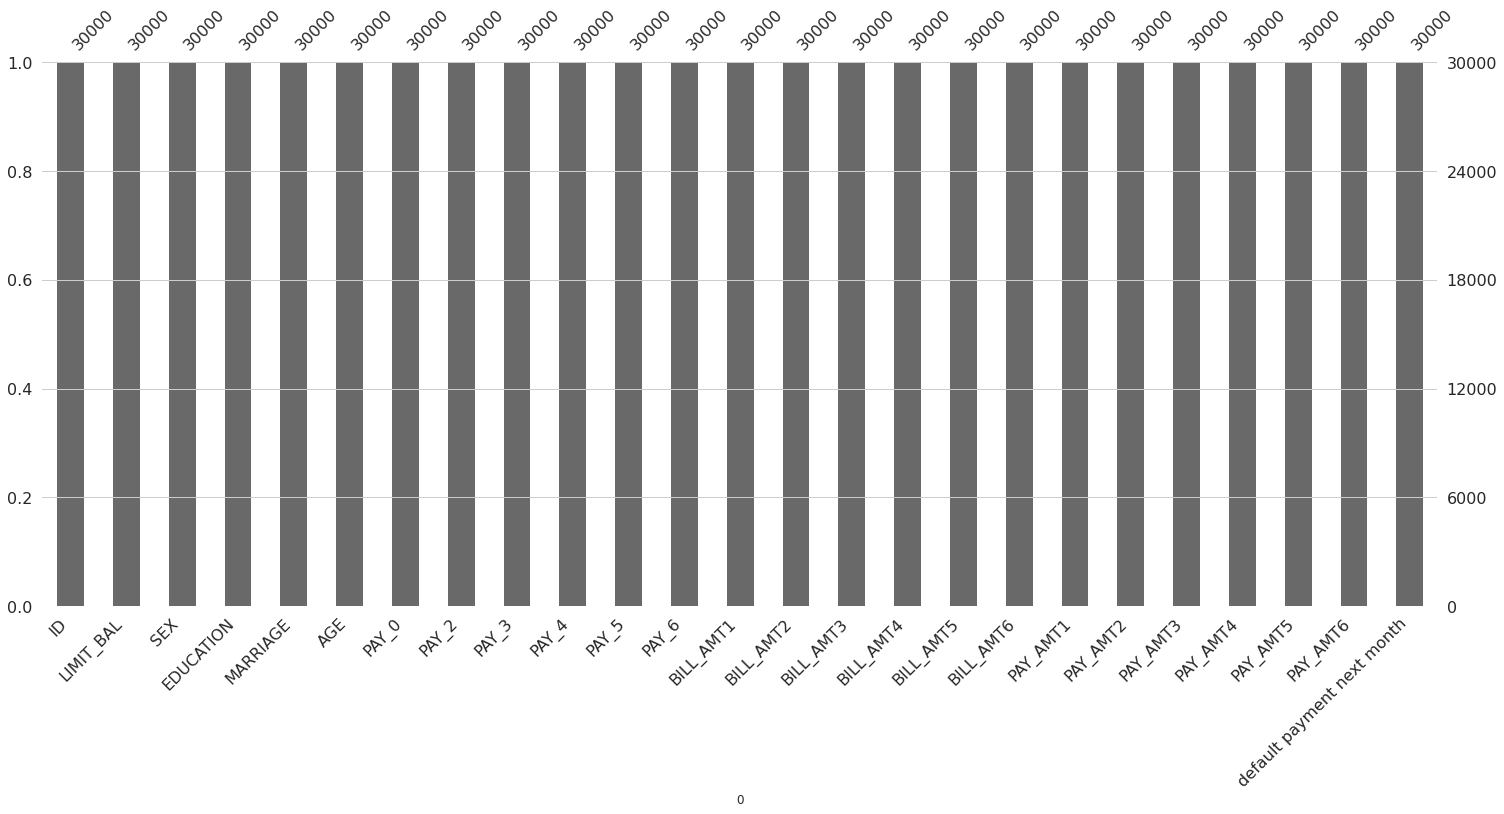

In [78]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

There is no missing values in dataset.

### What did you know about your dataset?

Answer Here:
1. There are 30000 distinct credit card clients.
2. The average value for the amount of credit card limit is 167484.32.
3. The standard deviation is unusually large,max value being 1000000.
4. Education Level is mostly graduate school and university.
5. Most of clients are either married or single.
6. Average age is 35.5 years, with a standard deviation of 9.2.
7. As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card contracts that will default next month.

## ***2. Understanding Your Variables***

In [79]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [80]:
# Dataset Describe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 

Answer Here:

**Attribute Information:-**

**ID: ID of each client**

**LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit**

**SEX: Gender (1=male, 2=female)**

**EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)**

**MARRIAGE: Marital status (1=married, 2=single, 3=others)**

**AGE: Age in years**

**PAY_(0- 6): Repayment status in (September — April), 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)**

**BILL_AMT(1–6): Amount of bill statement in (September — April), 2005 (NT dollar)**

**PAY_AMT(1–6): Amount of previous payment in (September-April), 2005 (NT dollar)**

**default.payment.next.month: Default payment (1=yes, 0=no)**


### Check Unique Values for each variable.

In [81]:
# Check Unique Values for each variable.
df_unique = list(df.columns)
df_unique

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [82]:
type(df_unique)

list

In [83]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  ID is 30000 .
No. of unique values in  LIMIT_BAL is 81 .
No. of unique values in  SEX is 2 .
No. of unique values in  EDUCATION is 7 .
No. of unique values in  MARRIAGE is 4 .
No. of unique values in  AGE is 56 .
No. of unique values in  PAY_0 is 11 .
No. of unique values in  PAY_2 is 11 .
No. of unique values in  PAY_3 is 11 .
No. of unique values in  PAY_4 is 11 .
No. of unique values in  PAY_5 is 10 .
No. of unique values in  PAY_6 is 10 .
No. of unique values in  BILL_AMT1 is 22723 .
No. of unique values in  BILL_AMT2 is 22346 .
No. of unique values in  BILL_AMT3 is 22026 .
No. of unique values in  BILL_AMT4 is 21548 .
No. of unique values in  BILL_AMT5 is 21010 .
No. of unique values in  BILL_AMT6 is 20604 .
No. of unique values in  PAY_AMT1 is 7943 .
No. of unique values in  PAY_AMT2 is 7899 .
No. of unique values in  PAY_AMT3 is 7518 .
No. of unique values in  PAY_AMT4 is 6937 .
No. of unique values in  PAY_AMT5 is 6897 .
No. of unique values in  PAY_AMT

In [84]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [85]:
# Write your cvode to make your dataset analysis ready.
df.index = df['ID']

In [86]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,20000,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2,120000,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3,90000,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [87]:
df.drop('ID',axis=1,inplace=True)

In [88]:
df.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0


In [89]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

Categorical Features:
SEX:


*   1. Male
*   2. Female

In [90]:
df['SEX'].value_counts(dropna=False)

2    18112
1    11888
Name: SEX, dtype: int64

In [91]:
# converting Gender 1 & 2 value in Male & Female for better understanding  
df['SEX'] = df['SEX'].apply(lambda x:'Male'  if x == 1 else 'Female')

EDUCATION:

In [92]:
df['EDUCATION'].value_counts(dropna=False)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [93]:
df['EDUCATION']= df['EDUCATION'].apply(lambda x :'Graduate' if x==1 else ('University' if x==2 else ('High School' if x==3  else 'Others')))

**Marital Status:**

In [94]:
# Value count of Marital_status Column
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

The given values are 1 = Married; 2 = Single; 3 = others so 0 is not given in data, we include them on others

In [95]:
df['MARRIAGE']= df['MARRIAGE'].apply(lambda x: "Married" if x==1 else ("Single" if x==2 else 'Others'))

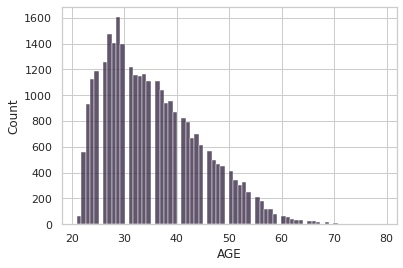

In [96]:
# visualizing the Age column for better understanding with histplot
sns.histplot(df['AGE'])

From this hist plot we can divide age into 9 bins.

In [97]:
# we are using Bining in AGE column
df['AGE'] = pd.cut(df.AGE, bins=[20,30,40,50,60,70,80],labels=['21-30','31-40','41-50','51-60','61-70','70-80'])

In [98]:
# Defining function for all Repayments status value which is less than 0, consider as 0
def repaymentsstatus(delay):
    if delay <= 0:
      return 0
    else:
      return delay

In [99]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [100]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

In [101]:
for i in df[['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].columns:
  df[i]=df[i].apply(repaymentsstatus)

Removed all the data of the people who had made their payment on time but still they were showing defaulter.

In [102]:
df= df[~((df['PAY_1']==0) & (df['PAY_2']==0) & (df['PAY_3']==0) & (df['PAY_4']==0) & (df['PAY_5']==0) & (df['PAY_6']==0) & (df['default payment next month']==1))]

In [104]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,21-30,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,Female,University,Single,21-30,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,Female,University,Single,31-40,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,Female,University,Married,31-40,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,Male,University,Married,51-60,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


- Dropped the unnmaned column
- Renamed the features in a proper format
- In data given values are 1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others.
- In marital status the given values are 1 = married; 2 = single; 3 = others and 0 is not given in data, we include them on others
- In the repayment column, we have not given information about 0 and -2 values so we placed less then zero value to zero

In [105]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [106]:
#renaming for better convenience
df['IsDefaulter'] = df['default payment next month']
df=df.drop('default payment next month',axis = 1)

In [107]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'IsDefaulter'],
      dtype='object', name=0)

In [108]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'SEX v/s COUNT')

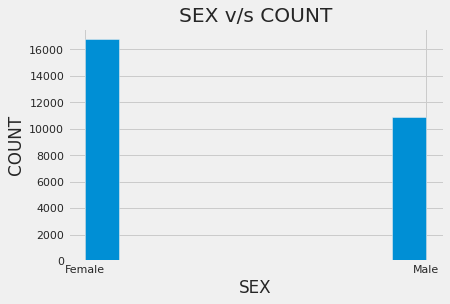

In [109]:
# Chart - 1 visualization code
plt.style.use('fivethirtyeight')
df['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

**Number of Male credit holder is less than Female.**

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

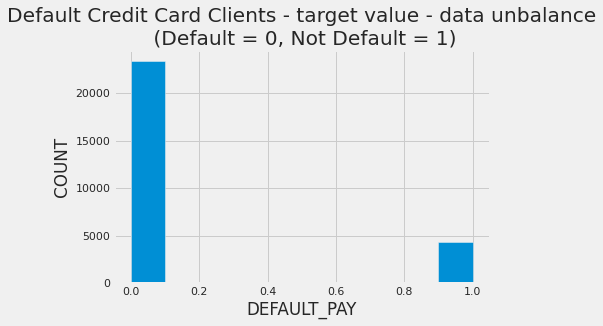

In [110]:
# Chart - 2 visualization code
plt.style.use('fivethirtyeight')
df['IsDefaulter'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

**Percentage of Non Defaulters are smaller than the Defaulters in the given dataset.**

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

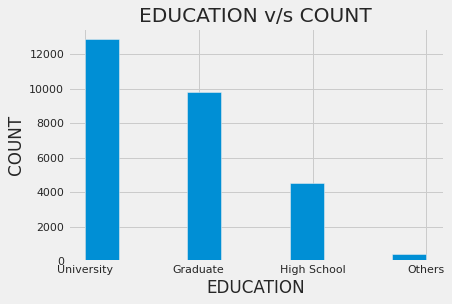

In [111]:
# Chart - 3 visualization code
plt.style.use('fivethirtyeight')
df['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

**More number of credit holders are university students followed by Graduates and then High school students.**

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

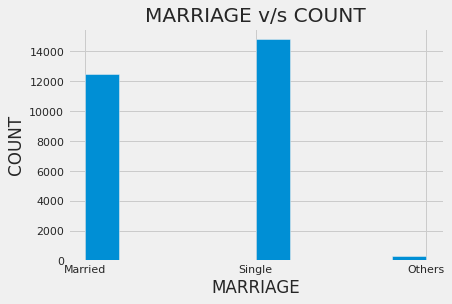

In [112]:
# Chart - 4 visualization code
plt.style.use('fivethirtyeight')
df['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

More number of credit cards holder are single.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

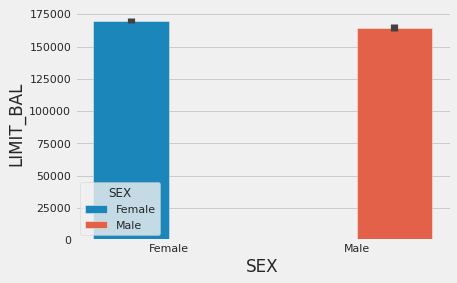

In [113]:
# Chart - 5 visualization code
sns.barplot(x='SEX',y='LIMIT_BAL',data=df,hue='SEX')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

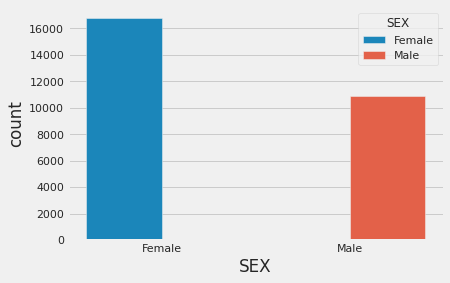

In [114]:
# Chart - 6 visualization code
sns.countplot(x='SEX',data=df,hue = 'SEX')

In [ ]:
df['SEX'].describe()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

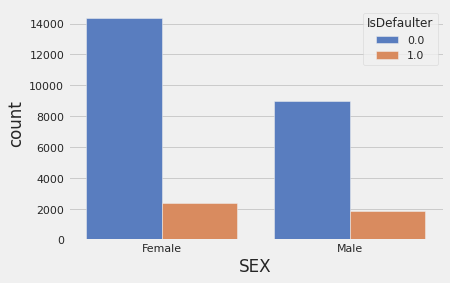

In [115]:
# Chart - 7 visualization code
# Checking the number of counts of defaulters and non defaulters sexwise


sns.countplot(x='SEX', data=df,hue="IsDefaulter", palette="muted")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

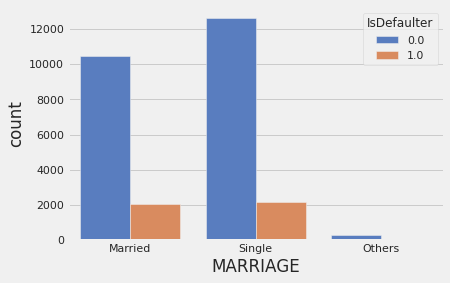

In [116]:
# Chart - 8 visualization code
g=sns.countplot(x="MARRIAGE", data=df,hue="IsDefaulter", palette="muted")

From the above plot it is clear that those people who have marital status single have less default payment wrt married status people.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

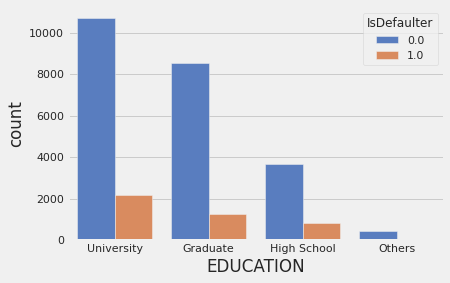

In [117]:
# Chart - 9 visualization code
g=sns.countplot(x="EDUCATION", data=df,hue="IsDefaulter", palette="muted")

From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [118]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'IsDefaulter'],
      dtype='object', name=0)

In [119]:
# Chart - 10 visualization code
PAY_VAR = ['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [120]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'IsDefaulter'],
      dtype='object', name=0)

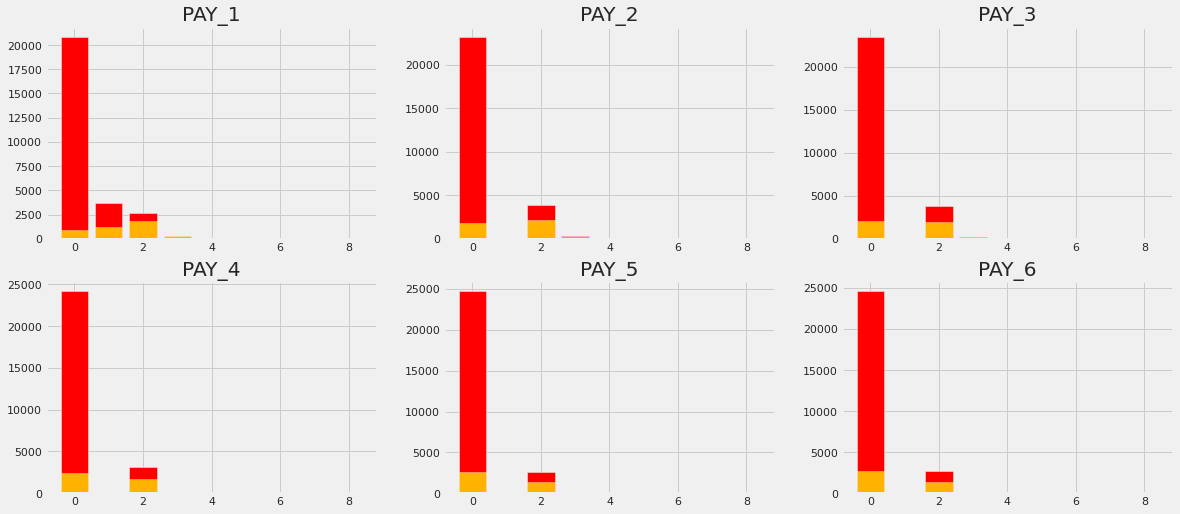

In [121]:
pay_status_columns = PAY_VAR
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)



for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['IsDefaulter']==1.0)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

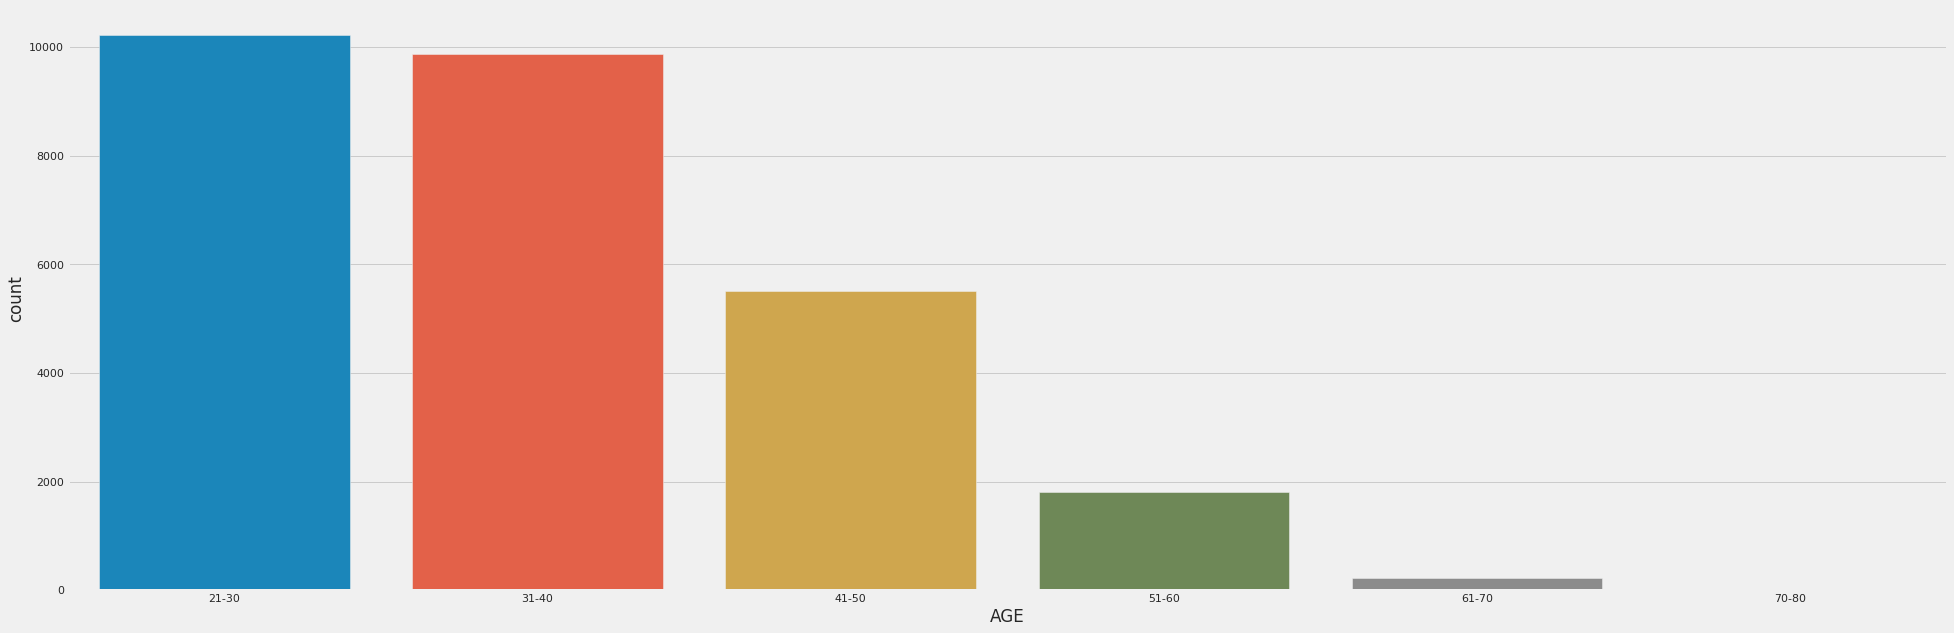

In [122]:
# Chart - 11 visualization code
plt.figure(figsize = (30,10))
sns.countplot(df['AGE'])

(array([10228.,     0.,  9868.,     0.,  1818.,     0.,  5504.,     0.,
          235.,    13.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

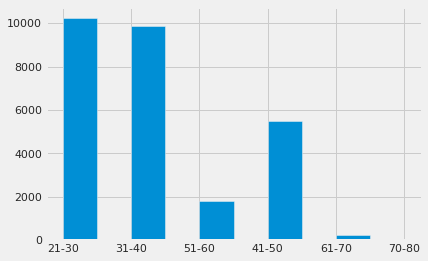

In [123]:
plt.hist(df['AGE'],bins=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
df.columns

#### Chart - 12

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.columns


<Figure size 720x360 with 0 Axes>

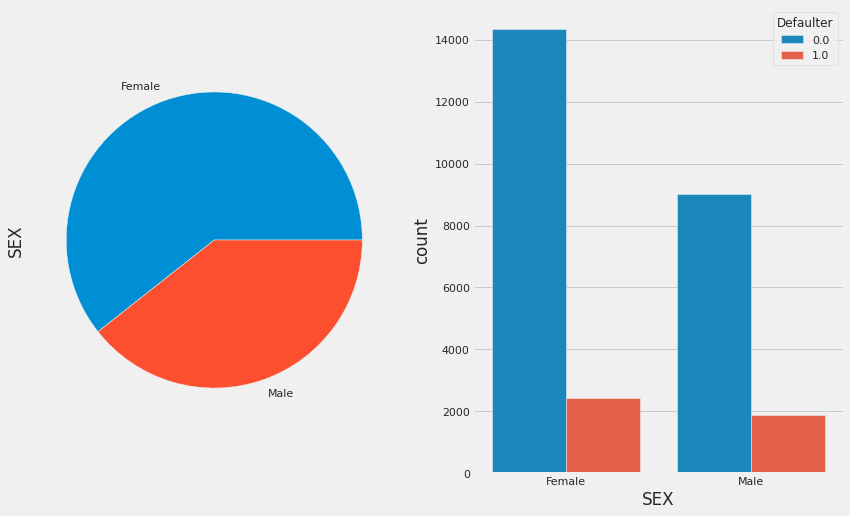

<Figure size 720x360 with 0 Axes>

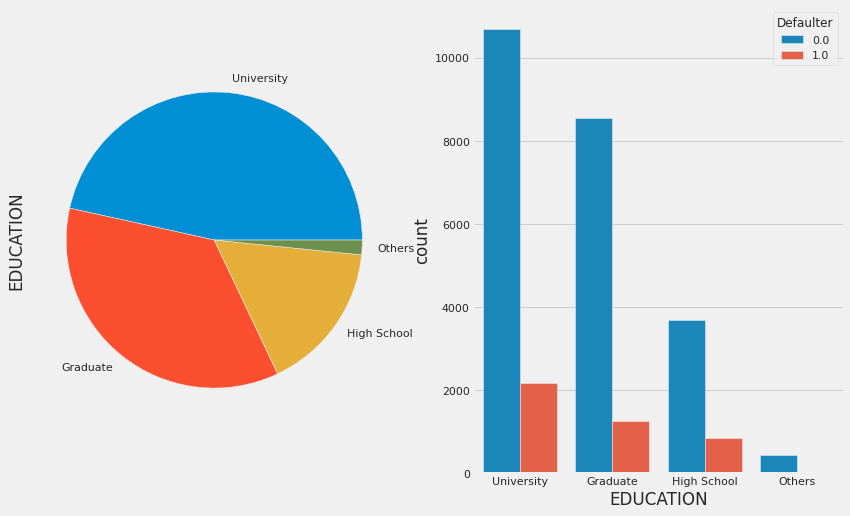

<Figure size 720x360 with 0 Axes>

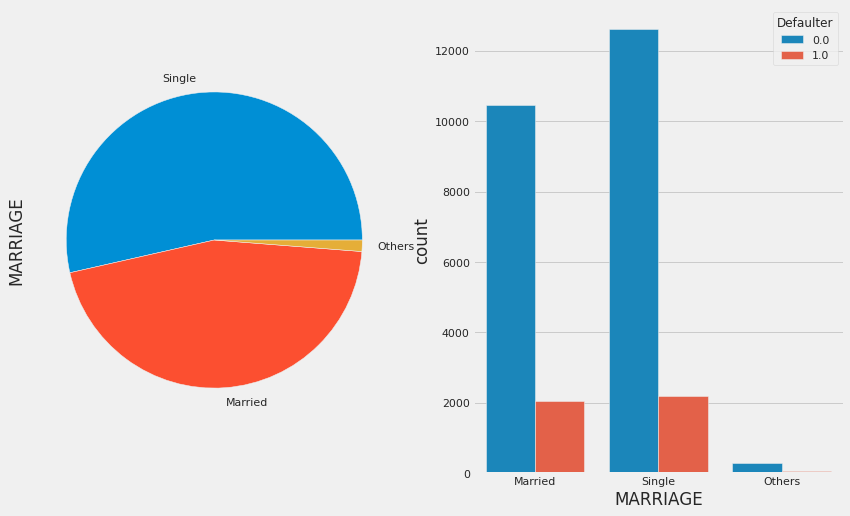

In [124]:
# Chart - 12 visualization code
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

1. There are more females credit card holder so no. of defaulter have high proportion of females.
2. No.of defaulters have a higher proportion of educated people (graduate school and university)
3. No.of defaulters have a higher proportion of singles.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [125]:
# Correlation Heatmap visualization code
correlation = df.corr()

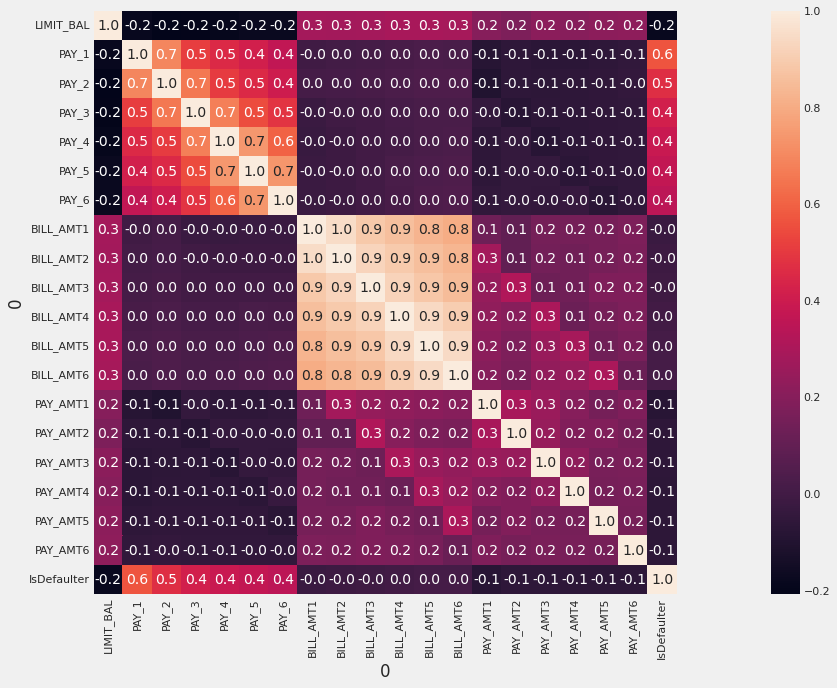

In [126]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" ) 

**So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.**

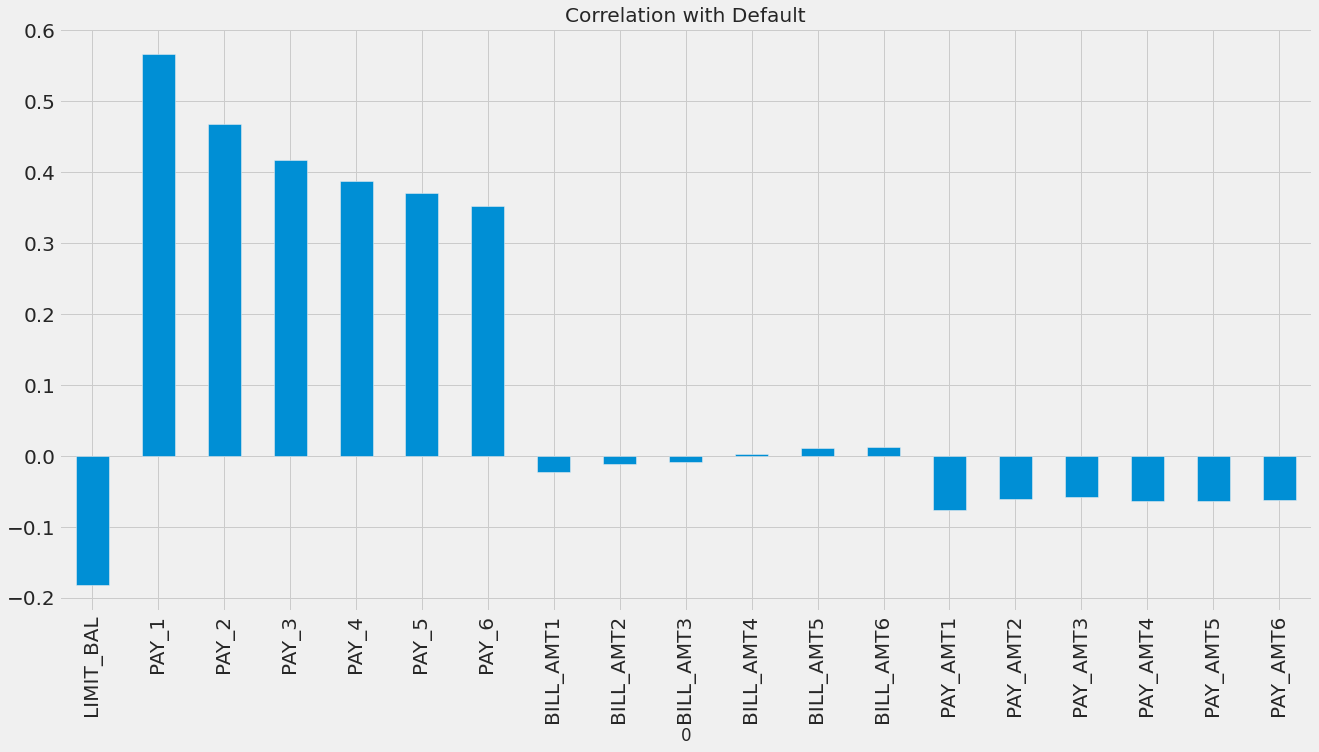

In [127]:
X = df.drop(['IsDefaulter'],axis=1)
X.corrwith(df['IsDefaulter']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

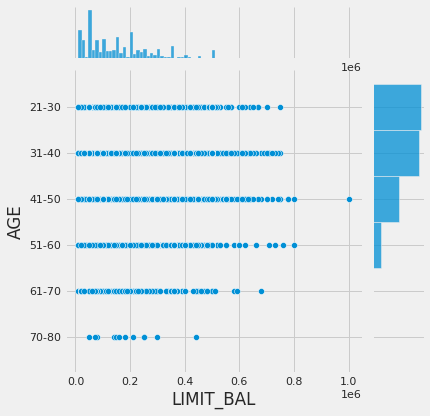

In [128]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=df,kind="scatter")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

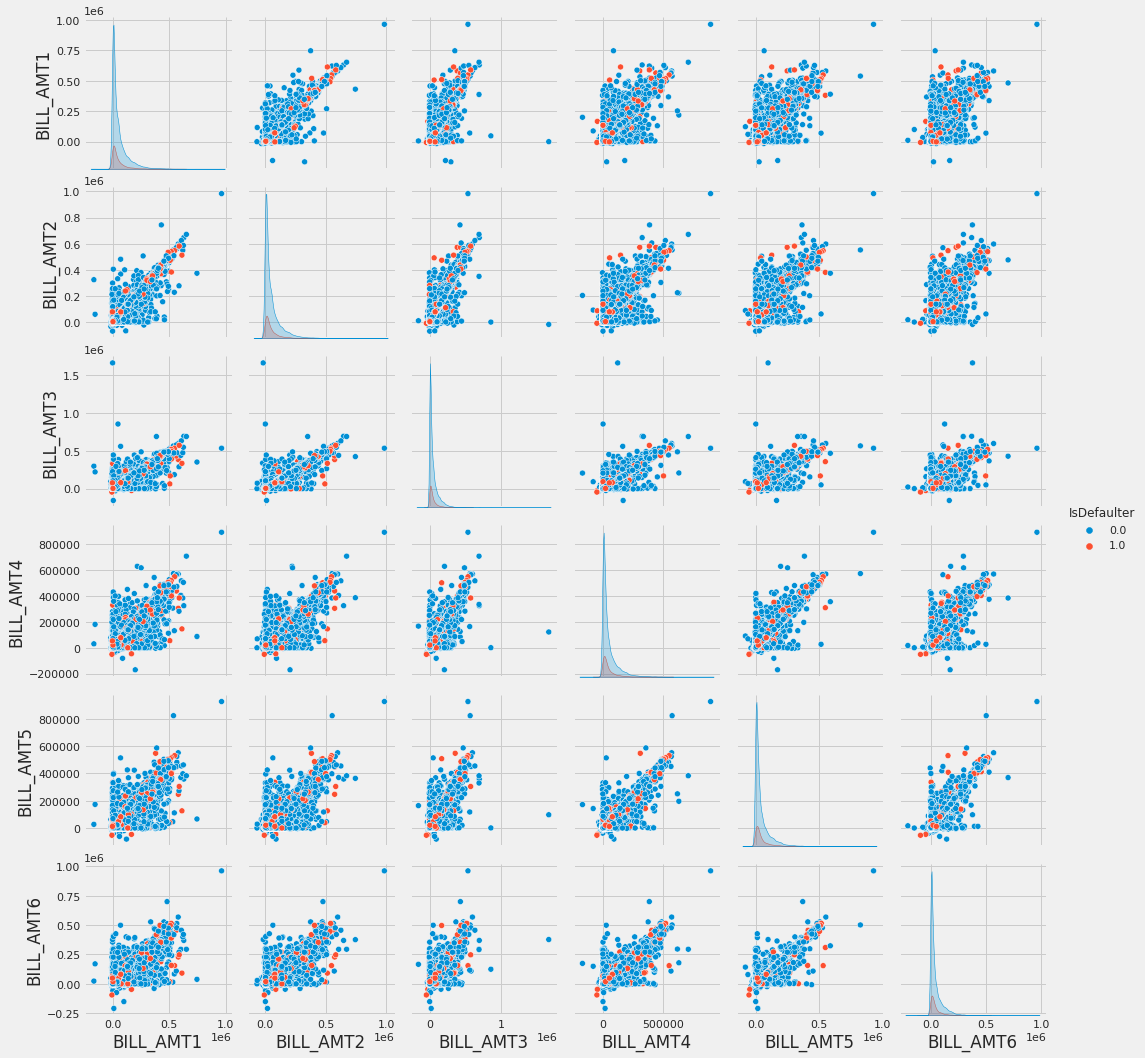

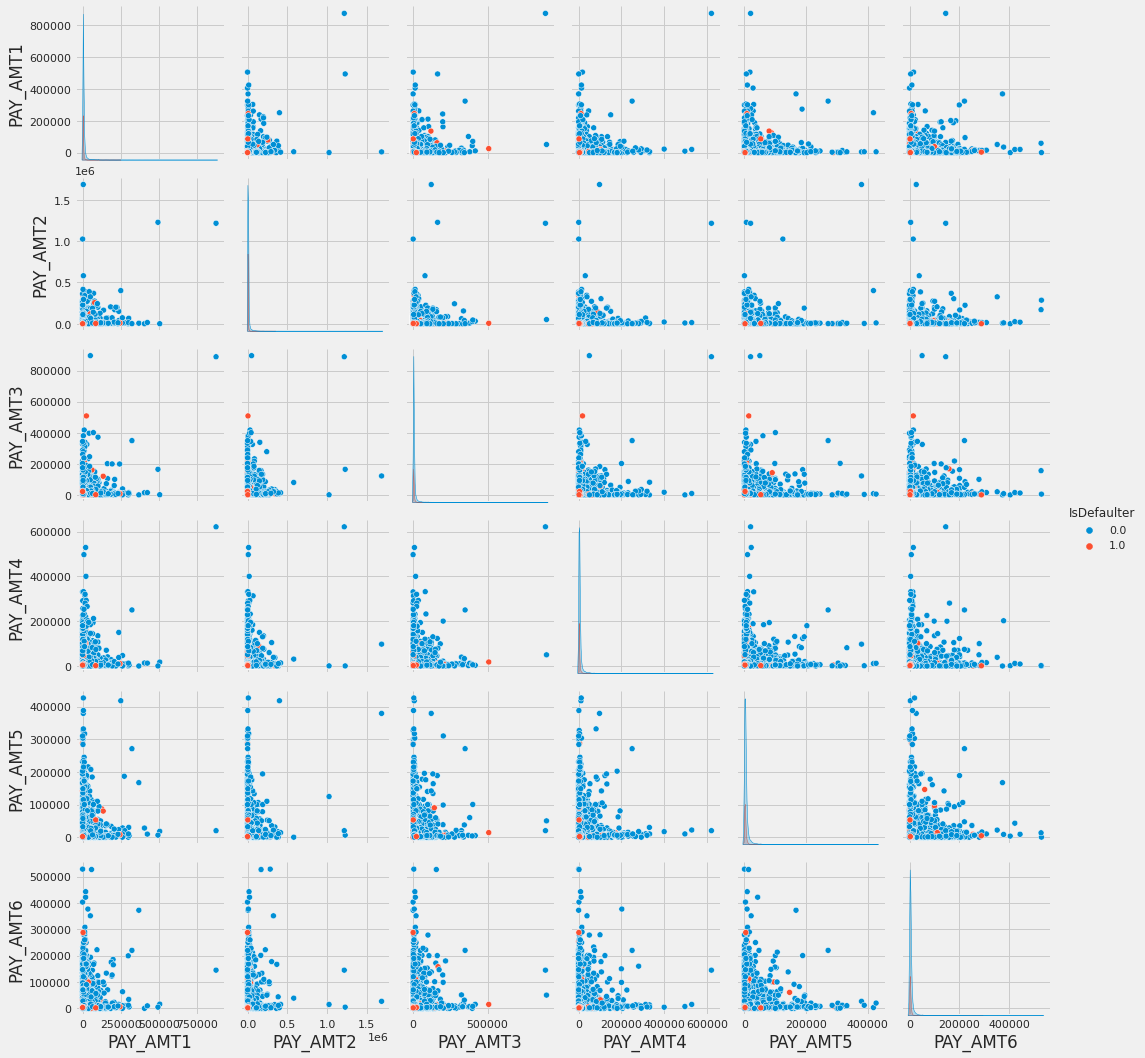

In [129]:
# Pair Plot visualization code
sns.pairplot(df, vars=df.columns[11:17], kind='scatter',hue= 'IsDefaulter')
sns.pairplot(df, vars=df.columns[17:23],hue = 'IsDefaulter')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.:



In [ ]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
df[col_to_norm] = df[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [ ]:
# performing the independant t test on numerical varialbe
import scipy.stats as stats

# make a dataframe
tstats_df= pd.DataFrame()

# run a loop for all numerical variable
for i in numerical_cols:
  tstats= stats.ttest_ind(df.loc[df['IsDefaulter']==1,i],df.loc[df['IsDefaulter']==0,i])
  temp= pd.DataFrame([i,tstats[0],tstats[1]]).T
  temp.columns=['Variable Name','T-statstic','P-value']
  tstats_df=pd.concat([tstats_df,temp],axis=0,ignore_index=True)

tstats_df=tstats_df.sort_values(by='P-value').reset_index(drop=True)
tstats_df

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.


:## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [130]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum() # Number of NULLs in the whole Data Frame

0
LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
IsDefaulter    0
dtype: int64

No such techniques used as there is no missing values available

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [131]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'IsDefaulter'],
      dtype='object', name=0)

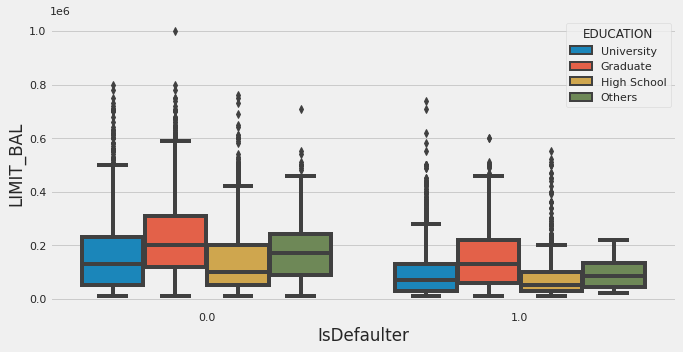

In [133]:
# Visualizing the outlier
plt.figure(figsize=(10,5))
sns.boxplot(x='IsDefaulter',hue='EDUCATION', y='LIMIT_BAL',data= df)

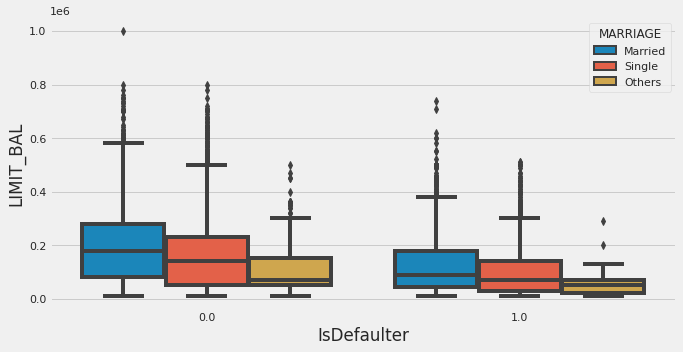

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(x='IsDefaulter',hue='MARRIAGE', y='LIMIT_BAL',data= df)

In [137]:
# Take a close look at the outlier
# The observations from other columns indicate that this was just a customer who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = df.loc[df['LIMIT_BAL']>900000]
outliers

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,
2198,1000000,Female,Graduate,Married,41-50,0,0,0,0,0,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0.0


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here. I found the outliers in my data and after observation from other columns i came to know this was just a customer who has an excellant payment history. Therefore it should be considered as a valid data. #improvise

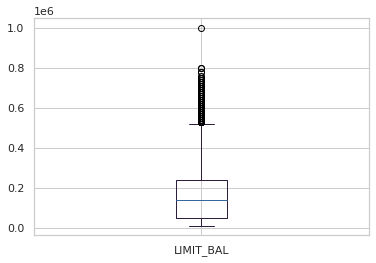

In [ ]:
df['LIMIT_BAL'].plot(kind='box')

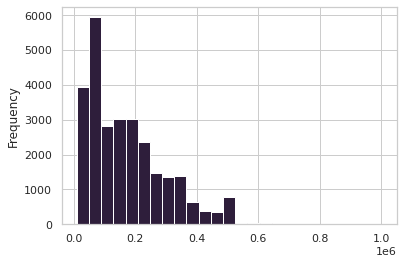

In [ ]:
df['LIMIT_BAL'].plot(kind='hist', bins=25)

In [ ]:
df['LIMIT_BAL'].describe()

count              27,666.0
mean    167,975.92713077425
std     129,916.93156708476
min                10,000.0
25%                50,000.0
50%               140,000.0
75%               240,000.0
max             1,000,000.0
Name: LIMIT_BAL, dtype: float64

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df[df['LIMIT_BAL'] < 200000].shape

(17351, 24)

Most of the values (18850) are clustered below 200,000 of given credit. Some outliers do appear above the maximum non-outlier value of 525,000 where we are using the definition of an outlier being any value

a) greater than the Q3 value + 1.5(the interquartile range) b) any value less than Q1 - 1.5(the interquartile range)

These values make perfect sense, so there is no need to get rid of them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27666 entries, 1 to 29999
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LIMIT_BAL    27666 non-null  int64   
 1   SEX          27666 non-null  object  
 2   EDUCATION    27666 non-null  object  
 3   MARRIAGE     27666 non-null  object  
 4   AGE          27666 non-null  category
 5   PAY_1        27666 non-null  int64   
 6   PAY_2        27666 non-null  int64   
 7   PAY_3        27666 non-null  int64   
 8   PAY_4        27666 non-null  int64   
 9   PAY_5        27666 non-null  int64   
 10  PAY_6        27666 non-null  int64   
 11  BILL_AMT1    27666 non-null  float64 
 12  BILL_AMT2    27666 non-null  float64 
 13  BILL_AMT3    27666 non-null  float64 
 14  BILL_AMT4    27666 non-null  float64 
 15  BILL_AMT5    27666 non-null  float64 
 16  BILL_AMT6    27666 non-null  float64 
 17  PAY_AMT1     27666 non-null  float64 
 18  PAY_AMT2     27666 non-nul

### 3. Categorical Encoding

One hot encoding

In [141]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'IsDefaulter'],
      dtype='object', name=0)

In [142]:
# Encode your categorical columns
# Using One hot encoding on categorical features and storing 
df = pd.get_dummies(df,columns =['SEX','EDUCATION','MARRIAGE','AGE'])

In [143]:
df.columns

Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'IsDefaulter', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate', 'EDUCATION_High School', 'EDUCATION_Others',
       'EDUCATION_University', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single', 'AGE_21-30', 'AGE_31-40', 'AGE_41-50', 'AGE_51-60',
       'AGE_61-70', 'AGE_70-80'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding technique is used here as we were having categorical features.

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
 #not req.

#### 2. Feature Selection

In [144]:
df.columns

Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'IsDefaulter', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate', 'EDUCATION_High School', 'EDUCATION_Others',
       'EDUCATION_University', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single', 'AGE_21-30', 'AGE_31-40', 'AGE_41-50', 'AGE_51-60',
       'AGE_61-70', 'AGE_70-80'],
      dtype='object')

In [145]:
# Select your features wisely to avoid overfitting
X = df.drop(columns=['IsDefaulter','AGE_21-30','AGE_31-40','AGE_41-50','AGE_51-60','AGE_61-70', 'AGE_70-80'])
y = df['IsDefaulter']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#Not required.

### 6. Data Splitting

In [169]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1,stratify=y)

In [148]:
X_train.shape

(22132, 28)

In [149]:
X_test.shape

(5534, 28)

##### What data splitting ratio have you used and why? 

Answer Here.

### 6. Data Scaling

In [150]:
# Scaling your data

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

0.0    23364
1.0     4302
Name: IsDefaulter, dtype: int64
 


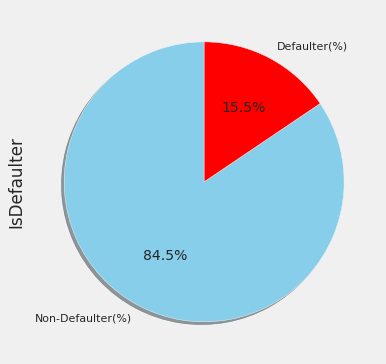

In [151]:
# Handling Imbalanced Dataset (If needed)
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df.IsDefaulter.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['IsDefaulter'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Non-Defaulter(%)','Defaulter(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

From graph, we can observe that Dataset does not have too much imbalance as it can be managed without using any technique.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [161]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=100)

# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression()

In [162]:
# Checking the coefficients
clf.coef_

array([[-1.98013912, 10.74302335,  0.76142546,  1.93760321,  0.83109836,
         0.92516358,  2.10746513, -1.05068881,  0.17247301, -0.8148027 ,
        -0.08330878,  0.81401938,  0.77002797, -1.92924566, -1.52643798,
        -0.64019124, -1.70227509, -1.96378907, -2.22248578, -0.13958539,
        -0.06092715,  0.480609  ,  0.31829959, -1.31453861,  0.3151175 ,
         0.03747434, -0.0734261 , -0.16456077]])

In [163]:
# Checking the intercept value
clf.intercept_

array([-2.71428605])

In [164]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [165]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [166]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8839689137899873
The accuracy on test data is  0.8870617997831587


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[17984   707]
 [ 1861  1580]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

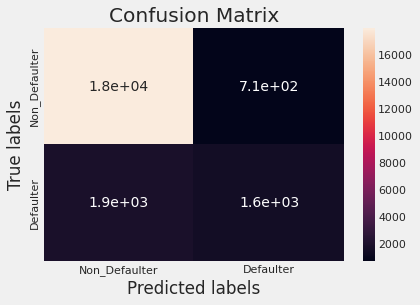

In [170]:
# Visualizing evaluation Metric Score chart

#  confusion matrix for train 
labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4509  164]
 [ 461  400]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

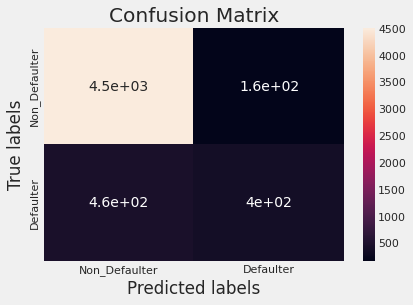

In [171]:
# Get the confusion matrix for test

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [172]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93     19845
         1.0       0.46      0.69      0.55      2287

    accuracy                           0.88     22132
   macro avg       0.71      0.80      0.74     22132
weighted avg       0.91      0.88      0.89     22132

 
roc_auc_score_train
0.710671577378169


In [173]:
# report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      4970
         1.0       0.46      0.71      0.56       564

    accuracy                           0.89      5534
   macro avg       0.71      0.81      0.75      5534
weighted avg       0.91      0.89      0.90      5534

 
roc_auc_score_test
0.7147404232135929


#### 2. Cross- Validation & Hyperparameter Tuning

In [179]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(logistic, param_grid=grid, n_jobs=-1, cv=5, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)
# Fit the Algorithm

# Predict on the model

Best: 0.136702 using {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


In [180]:
# result dataframe for train data
lr_train_roc=roc_auc_score(y_train, train_class_preds)
lr_train_acc = accuracy_score(y_train, train_class_preds)
lr_train_prec = precision_score(y_train, train_class_preds)
lr_train_rec = recall_score(y_train, train_class_preds)
lr_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Logistic Regression', lr_train_acc,lr_train_prec,lr_train_rec, lr_train_f1,lr_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.84484,0.531532,0.017146,0.033221,0.507182


In [181]:
# result dataframe for test data
lr_test_roc=roc_auc_score(y_test, test_class_preds)
lr_test_acc = accuracy_score(y_test, test_class_preds)
lr_test_prec = precision_score(y_test, test_class_preds)
lr_test_rec = recall_score(y_test, test_class_preds)
lr_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Logistic Regression', lr_test_acc,lr_test_prec,lr_test_rec, lr_test_f1,lr_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.845862,0.625,0.023229,0.044793,0.51033


In [182]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     22021
         1.0       0.02      0.53      0.03       111

    accuracy                           0.84     22132
   macro avg       0.51      0.69      0.47     22132
weighted avg       0.99      0.84      0.91     22132

 
roc_auc_score_train
0.5071820454003703


In [183]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      5502
         1.0       0.02      0.62      0.04        32

    accuracy                           0.85      5534
   macro avg       0.51      0.74      0.48      5534
weighted avg       0.99      0.85      0.91      5534

 
roc_auc_score_test
0.5103304301056829


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [184]:
# Visualizing evaluation Metric Score chart
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

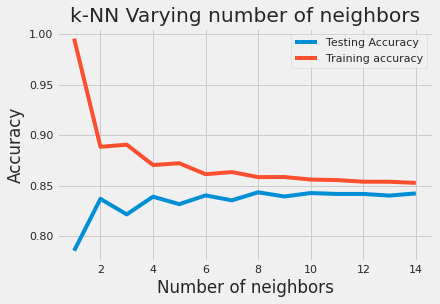

In [185]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [186]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=14)

# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [187]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = knn.predict(X_train)
test_class_preds = knn.predict(X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

[[18486   205]
 [ 3056   385]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

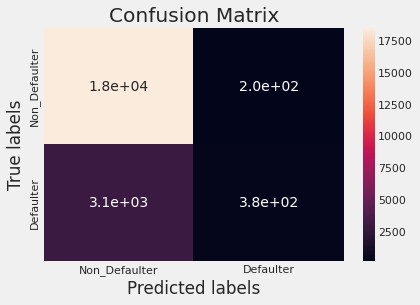

In [188]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
# Fit the Algorithm

# Predict on the model

[[4586   87]
 [ 786   75]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

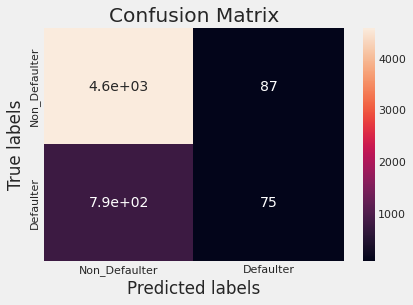

In [189]:
# Get the confusion matrix test

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [190]:
kn_train_roc=roc_auc_score(y_train, train_class_preds)
kn_train_acc = accuracy_score(y_train, train_class_preds)
kn_train_prec = precision_score(y_train, train_class_preds)
kn_train_rec = recall_score(y_train, train_class_preds)
kn_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Random Forest', kn_train_acc,kn_train_prec,kn_train_rec, kn_train_f1,kn_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.852657,0.652542,0.111886,0.19102,0.550459


In [191]:
kn_test_roc=roc_auc_score(y_test, test_class_preds)
kn_test_acc = accuracy_score(y_test, test_class_preds)
kn_test_prec = precision_score(y_test, test_class_preds)
kn_test_rec = recall_score(y_test, test_class_preds)
kn_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Random Forest', kn_test_acc,kn_test_prec,kn_test_rec, kn_test_f1,kn_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.842248,0.462963,0.087108,0.146628,0.534245


In [192]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     21542
         1.0       0.11      0.65      0.19       590

    accuracy                           0.85     22132
   macro avg       0.55      0.76      0.55     22132
weighted avg       0.97      0.85      0.90     22132

 
roc_auc_score_train
0.5504591170704412


In [193]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      5372
         1.0       0.09      0.46      0.15       162

    accuracy                           0.84      5534
   macro avg       0.53      0.66      0.53      5534
weighted avg       0.96      0.84      0.89      5534

 
roc_auc_score_test
0.5342452117621356


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [194]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

# Fit the Algorithm

# Predict on the model

In [195]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9964305078619194
The accuracy on test dataset is 0.882724972894832


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[18674    17]
 [   62  3379]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

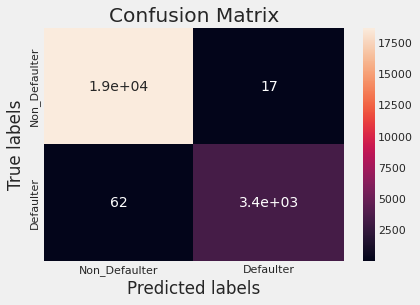

In [196]:
# Visualizing evaluation Metric Score chart

#confusion matrix for train

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4426  247]
 [ 402  459]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

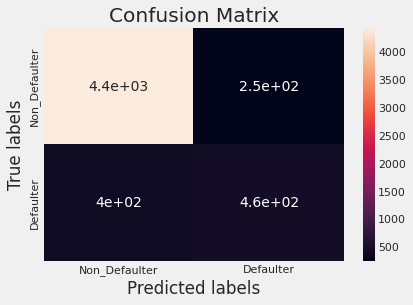

In [197]:
#confusion matrix for train

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [198]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18736
         1.0       0.98      0.99      0.99      3396

    accuracy                           1.00     22132
   macro avg       0.99      1.00      0.99     22132
weighted avg       1.00      1.00      1.00     22132

 
roc_auc_score_train
0.9905362266659148


In [199]:
# report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      4828
         1.0       0.53      0.65      0.59       706

    accuracy                           0.88      5534
   macro avg       0.74      0.78      0.76      5534
weighted avg       0.89      0.88      0.89      5534

 
roc_auc_score_test
0.7401221040732923


#### 2. Cross- Validation & Hyperparameter Tuning

In [200]:
# n_estimators-----> Number of trees

# max_depth--------> Maximum depth of trees

# min_samples_split------> Minimum number of samples required to split a node 

# min_samples_leaf-------> Minimum number of samples required at each leaf node 

In [201]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# random forest model
randomForest = RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[50,80,100],'max_depth':[4,6,8],
             'min_samples_split':[50,100,150],
             'min_samples_leaf':[40,50]
             }
# Fit the Algorithm
rf_grid= GridSearchCV(randomForest, parameters, scoring='f1', cv=6)
rf_grid.fit(X_train,y_train)
# Fit the Algorithm

# Predict on the model

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1')

In [202]:
# model best parameters
print(f'The best fit is found to be {rf_grid.best_params_}')

The best fit is found to be {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}


In [203]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)

[[17895   796]
 [ 1510  1931]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

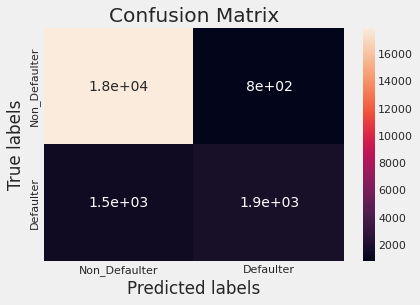

In [204]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4461  212]
 [ 399  462]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

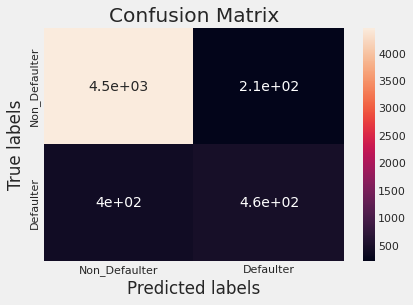

In [205]:
# Get the confusion matrix test

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [208]:
# result dataframe for train data
rf_train_roc=roc_auc_score(y_train, train_class_preds)
rf_train_acc = accuracy_score(y_train, train_class_preds)
rf_train_prec = precision_score(y_train, train_class_preds)
rf_train_rec = recall_score(y_train, train_class_preds)
rf_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Random Forest', rf_train_acc,rf_train_prec,rf_train_rec, rf_train_f1,rf_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.895807,0.708104,0.561174,0.626135,0.759293


In [209]:
# result dataframe for test data
rf_test_roc=roc_auc_score(y_test, test_class_preds)
rf_test_acc = accuracy_score(y_test, test_class_preds)
rf_test_prec = precision_score(y_test, test_class_preds)
rf_test_rec = recall_score(y_test, test_class_preds)
rf_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Random Forest', rf_test_acc,rf_test_prec,rf_test_rec, rf_test_f1,rf_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.889592,0.68546,0.536585,0.601954,0.745609


In [210]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     19405
         1.0       0.56      0.71      0.63      2727

    accuracy                           0.90     22132
   macro avg       0.76      0.82      0.78     22132
weighted avg       0.91      0.90      0.90     22132

 
roc_auc_score_train
0.7592933679009262


In [211]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      4860
         1.0       0.54      0.69      0.60       674

    accuracy                           0.89      5534
   macro avg       0.75      0.80      0.77      5534
weighted avg       0.90      0.89      0.90      5534

 
roc_auc_score_test
0.7456091819638505


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

**## ML Model - 4**

In [212]:
# ML Model - 3 Implementation
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[17790   901]
 [ 1382  2059]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

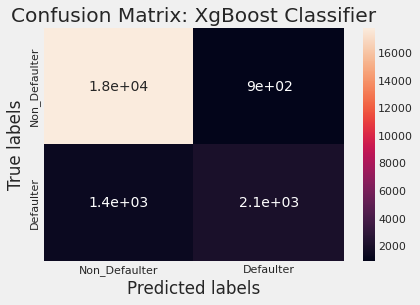

In [214]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: XgBoost Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4427  246]
 [ 366  495]]


[Text(0, 0.5, 'Non_Defaulter'), Text(0, 1.5, 'Defaulter')]

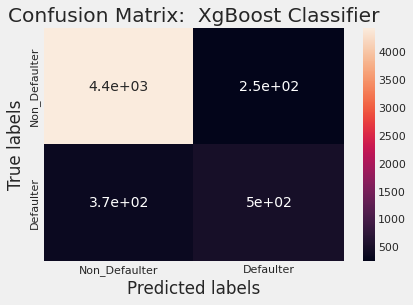

In [215]:
# Get the confusion matrix test

labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix:  XgBoost Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [216]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     19172
         1.0       0.60      0.70      0.64      2960

    accuracy                           0.90     22132
   macro avg       0.78      0.81      0.79     22132
weighted avg       0.90      0.90      0.90     22132

 
roc_auc_score_train
0.77508377382821


In [217]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      4793
         1.0       0.57      0.67      0.62       741

    accuracy                           0.89      5534
   macro avg       0.76      0.80      0.78      5534
weighted avg       0.90      0.89      0.89      5534

 
roc_auc_score_test
0.7611350250642918


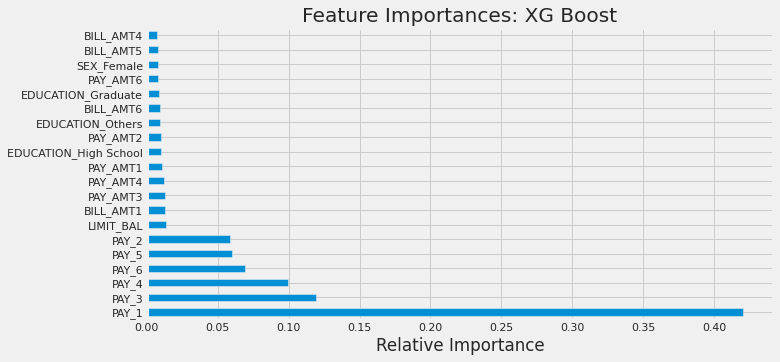

In [218]:
# Feature importances
rf_feat_imp = pd.Series(xg_models.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

- Gender_male in the most important feature in deciding the outcome of the variables for XG boost followed by Repayment_Sept.
- Multiple features are given importance here rather than just one feature in case of XG boost.

#### 2. Cross- Validation & Hyperparameter Tuning

In [219]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# random forest model
Xgboost = XGBClassifier(random_state=0)
parameters = {'n_estimators':[50,80,100],'max_depth':[4,6,8],
             'min_samples_split':[50,100,150],
             'min_samples_leaf':[40,50]
             }
# Fit the Algorithm
XGB_grid= GridSearchCV(Xgboost, parameters, scoring='roc_auc', cv=5)
XGB_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [220]:
# model best parameters
print(f'The best fit is found to be {XGB_grid.best_params_}')

The best fit is found to be {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [221]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = XGB_grid.predict(X_train)
test_class_preds = XGB_grid.predict(X_test)

In [222]:
# result dataframe for train data
Xgb_train_roc=roc_auc_score(y_train, train_class_preds)
Xgb_train_acc = accuracy_score(y_train, train_class_preds)
Xgb_train_prec = precision_score(y_train, train_class_preds)
Xgb_train_rec = recall_score(y_train, train_class_preds)
Xgb_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['XGBoost Classifier', Xgb_train_acc,Xgb_train_prec,Xgb_train_rec, Xgb_train_f1,Xgb_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBoost Classifier,0.903307,0.720733,0.617262,0.664997,0.786615


In [223]:
# result dataframe for test data
Xgb_test_roc=roc_auc_score(y_test, test_class_preds)
Xgb_test_acc = accuracy_score(y_test, test_class_preds)
Xgb_test_prec = precision_score(y_test, test_class_preds)
Xgb_test_rec = recall_score(y_test, test_class_preds)
Xgb_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['XGBoost Classifier', Xgb_test_acc,Xgb_test_prec,Xgb_test_rec, Xgb_test_f1,Xgb_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBoost Classifier,0.887423,0.661247,0.566783,0.610381,0.756642


In [224]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94     19185
         1.0       0.62      0.72      0.66      2947

    accuracy                           0.90     22132
   macro avg       0.79      0.83      0.80     22132
weighted avg       0.91      0.90      0.91     22132

 
roc_auc_score_train
0.786615268354798


In [226]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      4796
         1.0       0.57      0.66      0.61       738

    accuracy                           0.89      5534
   macro avg       0.76      0.79      0.77      5534
weighted avg       0.90      0.89      0.89      5534

 
roc_auc_score_test
0.7566419938296781


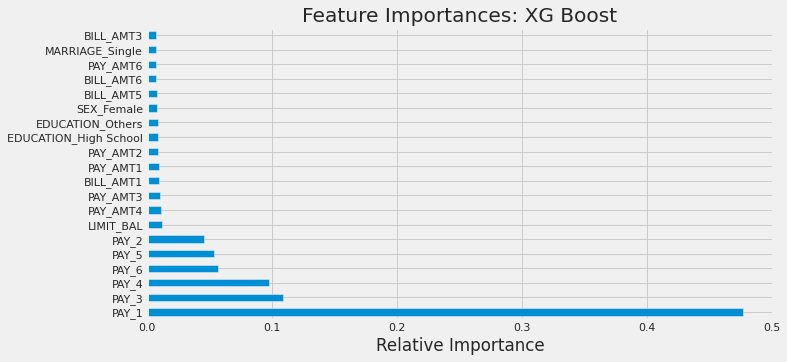

In [227]:
# Feature importances
rf_feat_imp = pd.Series(XGB_grid.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

In [228]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Model','Train_Accuracy','Test_Accuracy', 'Train_Precision','Test_Precision','Train_Recall','Test_Recall','Train_F1_score','Test_F1_score'])
test.add_row(['1','Logistic Regression',lr_train_acc,lr_test_acc,lr_train_prec,lr_test_prec,lr_train_rec,lr_test_rec,lr_train_f1,lr_test_f1])
test.add_row(['2','k_nearest neighbours',kn_train_acc,kn_test_acc,kn_train_prec,kn_test_prec,kn_train_rec,kn_test_rec,kn_train_f1,kn_test_f1])
test.add_row(['3','Random Forest',rf_train_acc,rf_test_acc,rf_train_prec,rf_test_prec,rf_train_rec,rf_test_rec,rf_train_f1,rf_test_f1])
test.add_row(['4','XGboost Classsifier',Xgb_train_acc,Xgb_test_acc,Xgb_train_prec,Xgb_test_prec,Xgb_train_rec,Xgb_test_rec,Xgb_train_f1,Xgb_test_f1])

print(test)

+---------+----------------------+--------------------+--------------------+--------------------+---------------------+----------------------+----------------------+---------------------+---------------------+
| Sl. No. |        Model         |   Train_Accuracy   |   Test_Accuracy    |  Train_Precision   |    Test_Precision   |     Train_Recall     |     Test_Recall      |    Train_F1_score   |    Test_F1_score    |
+---------+----------------------+--------------------+--------------------+--------------------+---------------------+----------------------+----------------------+---------------------+---------------------+
|    1    | Logistic Regression  | 0.8448400506054582 | 0.8458619443440549 | 0.5315315315315315 |        0.625        | 0.017146178436501017 | 0.023228803716608595 | 0.03322072072072072 | 0.04479283314669653 |
|    2    | k_nearest neighbours | 0.8526567865534068 | 0.8422479219371161 | 0.652542372881356  | 0.46296296296296297 | 0.11188607962801511  | 0.087108013937282

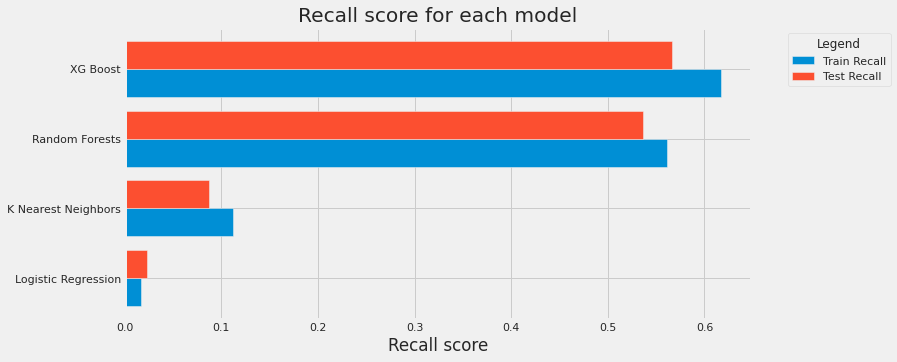

In [229]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Random Forests','XG Boost']
train_recalls = [lr_train_rec,kn_train_rec,rf_train_rec,Xgb_train_rec]
test_recalls = [lr_test_rec,kn_test_rec,rf_test_rec,Xgb_test_rec]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

In [230]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.4 MB/s eta 0:00:00


In [231]:
# importing shap
import shap 

In [232]:
#Get shap values
explainer = shap.Explainer(XGB_grid.best_estimator_)
shap_values = explainer(X_test)

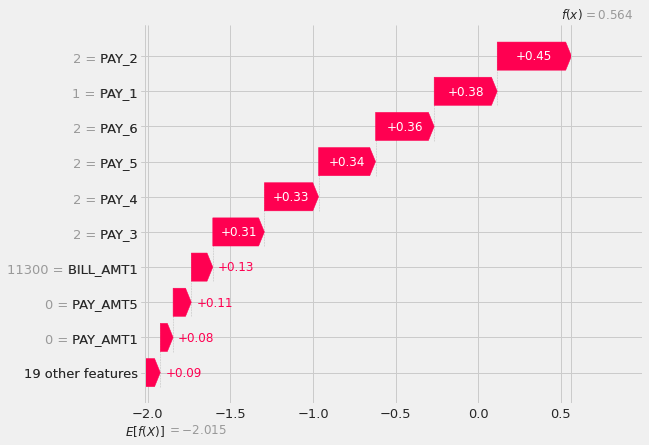

In [233]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [235]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

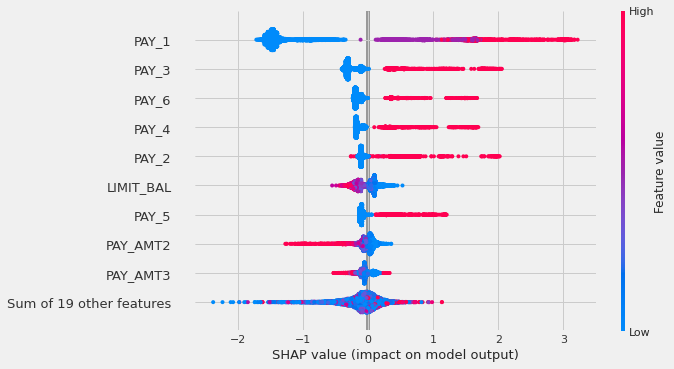

In [236]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***